In [2]:
# Loading the MBTA bus stops data
import pandas as pd
mbta_data = pd.read_csv("/Users/lijunyi/ds-boston-transit-performance/fa23-team-f/deliverables/extension/stops.csv")

# Performing an initial examination of the data
mbta_data_info = mbta_data.info()
mbta_data_head = mbta_data.head()

# Analyzing the distribution of wheelchair accessibility
wheelchair_distribution = mbta_data['wheelchair_boarding'].value_counts()

mbta_data_info, mbta_data_head, wheelchair_distribution



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711 entries, 0 to 9710
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              9711 non-null   object 
 1   stop_code            7108 non-null   float64
 2   stop_name            9711 non-null   object 
 3   stop_desc            2706 non-null   object 
 4   platform_code        309 non-null    object 
 5   platform_name        760 non-null    object 
 6   stop_lat             8860 non-null   float64
 7   stop_lon             8860 non-null   float64
 8   zone_id              7644 non-null   object 
 9   stop_address         305 non-null    object 
 10  stop_url             7766 non-null   object 
 11  level_id             2378 non-null   object 
 12  location_type        9711 non-null   int64  
 13  parent_station       2668 non-null   object 
 14  wheelchair_boarding  9711 non-null   int64  
 15  municipality         9711 non-null   o

(None,
   stop_id  stop_code                      stop_name stop_desc platform_code  \
 0       1        1.0   Washington St opp Ruggles St       NaN           NaN   
 1      10       10.0  Theo Glynn Way @ Newmarket Sq       NaN           NaN   
 2   10000    10000.0       Tremont St opp Temple Pl       NaN           NaN   
 3   10003    10003.0       Albany St opp Randall St       NaN           NaN   
 4   10005    10005.0     Albany St opp E Concord St       NaN           NaN   
 
   platform_name   stop_lat   stop_lon              zone_id stop_address  \
 0           NaN  42.330957 -71.082754  ExpressBus-Downtown          NaN   
 1           NaN  42.330555 -71.068787             LocalBus          NaN   
 2           NaN  42.355692 -71.062911             LocalBus          NaN   
 3           NaN  42.331591 -71.076237             LocalBus          NaN   
 4           NaN  42.335017 -71.071280             LocalBus          NaN   
 
                            stop_url level_id  locati

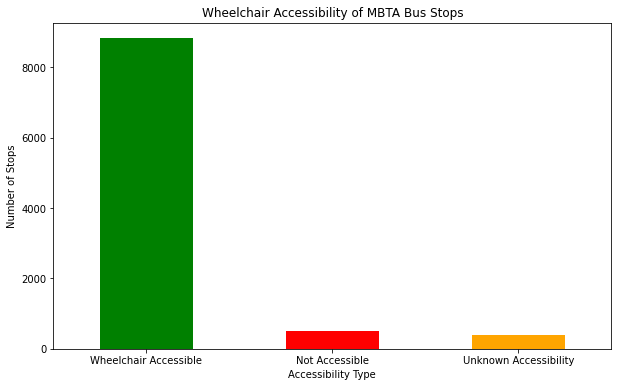

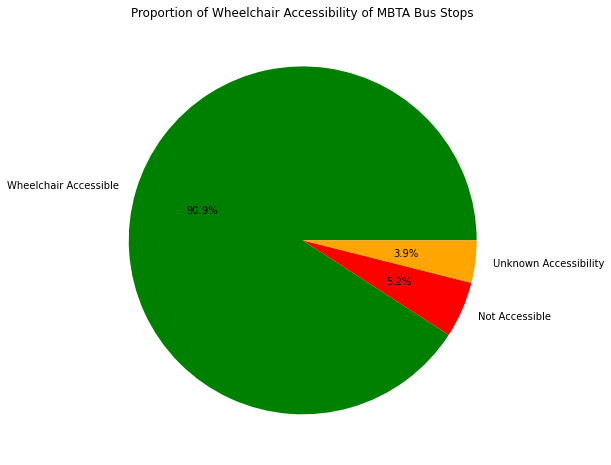

In [5]:
import matplotlib.pyplot as plt
# Preparing data for bar and pie chart
accessibility_counts = mbta_data['wheelchair_boarding'].value_counts()
accessibility_labels = ['Wheelchair Accessible', 'Not Accessible', 'Unknown Accessibility']

# Creating bar chart
plt.figure(figsize=(10, 6))
accessibility_counts.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Wheelchair Accessibility of MBTA Bus Stops')
plt.xlabel('Accessibility Type')
plt.ylabel('Number of Stops')
plt.xticks(ticks=[0, 1, 2], labels=accessibility_labels, rotation=0)
plt.show()

# Creating pie chart
plt.figure(figsize=(8, 8))
accessibility_counts.plot(kind='pie', labels=accessibility_labels, colors=['green', 'red', 'orange'], autopct='%1.1f%%')
plt.title('Proportion of Wheelchair Accessibility of MBTA Bus Stops')
plt.ylabel('')  # Hiding the default y-label
plt.show()


A significant majority of stops are wheelchair accessible, as indicated by the green segments in both charts.

A small fraction of stops are not accessible (red), and a relatively minor portion has an unknown status (orange).


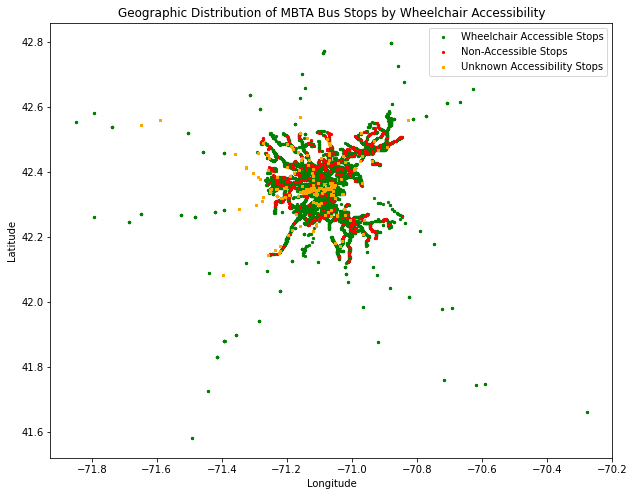

In [8]:
import geopandas as gpd
# Correcting the geographic visualization for wheelchair accessibility
gdf_mbta = gpd.GeoDataFrame(mbta_data, geometry=gpd.points_from_xy(mbta_data.stop_lon, mbta_data.stop_lat))

# Filtering for wheelchair-accessible stops
accessible_stops = gdf_mbta[gdf_mbta['wheelchair_boarding'] == 1]
non_accessible_stops = gdf_mbta[gdf_mbta['wheelchair_boarding'] == 0]
unknown_accessibility_stops = gdf_mbta[gdf_mbta['wheelchair_boarding'] == 2]
# Plotting the locations
fig, ax = plt.subplots(figsize=(12, 8))
accessible_stops.plot(ax=ax, marker='o', color='green', markersize=5, label='Wheelchair Accessible Stops')
non_accessible_stops.plot(ax=ax, marker='x', color='red', markersize=5, label='Non-Accessible Stops')
unknown_accessibility_stops.plot(ax=ax, marker='s', color='orange', markersize=5, label='Unknown Accessibility Stops')
plt.title('Geographic Distribution of MBTA Bus Stops by Wheelchair Accessibility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()


This visualization provides a clear geographic perspective on the accessibility of the MBTA bus network, emphasizing the focus on making the majority of stops wheelchair accessible.